# Train, Prune, and Quantize

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import helper
from squeezenet_model import SqueezeNetCIFAR10, SqueezeNetCIFAR10_QAT
from alexnet_model import AlexNetCIFAR10, AlexNetCIFAR10_QAT
from resnet32_model import ResNet, ResNetQAT

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device={device}")

Device=cuda


In [2]:
mname = "squeezenet"
# mname = "alexnet"
# mname = "resnet"

if mname == "squeezenet":
    get_model = SqueezeNetCIFAR10
    get_model_qat = SqueezeNetCIFAR10_QAT
elif mname == "alexnet":
    get_model = AlexNetCIFAR10
    get_model_qat = AlexNetCIFAR10_QAT
elif mname == "resnet":
    get_model = ResNet
    get_model_qat = ResNetQAT

In [ ]:
train_loader, test_loader = helper.load_dataset(batch_size=128)

In [4]:
model_fp32 = get_model()
# model_fp32.load_model('squeezenet_bn_cifar10_fp32.pth')

total_params = sum(p.numel() for p in model_fp32.parameters())
print(f"Total parameters: {total_params}")

trainable_params = sum(p.numel() for p in model_fp32.parameters() if p.requires_grad)
print(f"Trainable parameters: {trainable_params}")

Total parameters: 734986
Trainable parameters: 734986


## Training

In [5]:
train, test = True, True
epochs = 100
fp32_metrics = helper.train_model(model=model_fp32,train_loader=train_loader,test_loader=test_loader,train=train,test=test,device=device,epochs=epochs)

Epoch [1/100] 

Train Loss: 1.8751, Train Acc: 30.07% 

Test/Val Loss: 1.4926, Test/Val Acc: 43.38%
Epoch [2/100] 

Train Loss: 1.5512, Train Acc: 44.23% 

Test/Val Loss: 1.3409, Test/Val Acc: 52.87%
Epoch [3/100] 

Train Loss: 1.3660, Train Acc: 51.61% 

Test/Val Loss: 1.1332, Test/Val Acc: 60.12%
Epoch [4/100] 

Train Loss: 1.2357, Train Acc: 56.85% 

Test/Val Loss: 1.0156, Test/Val Acc: 64.71%
Epoch [5/100] 

Train Loss: 1.1389, Train Acc: 60.31% 

Test/Val Loss: 0.9756, Test/Val Acc: 66.26%
Epoch [6/100] 

Train Loss: 1.0638, Train Acc: 63.36% 

Test/Val Loss: 0.8380, Test/Val Acc: 71.22%
Epoch [7/100] 

Train Loss: 0.9968, Train Acc: 65.97% 

Test/Val Loss: 0.7539, Test/Val Acc: 74.26%
Epoch [8/100] 

Train Loss: 0.9540, Train Acc: 67.31% 

Test/Val Loss: 0.7506, Test/Val Acc: 74.68%
Epoch [9/100] 

Train Loss: 0.9097, Train Acc: 68.80% 

Test/Val Loss: 0.6813, Test/Val Acc: 76.65%
Epoch [10/100] 

Train Loss: 0.8710, Train Acc: 70.51% 

Test/Val Loss: 0.6668, Test/Val Acc: 77.28%
Epoch [11/100] 

Train Loss: 0.8419, Train Acc: 71.43% 

Test/Val Loss: 0.6563, Test/Val Acc: 77.30%
Epoch [12/100] 

Train Loss: 0.8157, Train Acc: 72.25% 

Test/Val Loss: 0.5788, Test/Val Acc: 80.63%
Epoch [13/100] 

Train Loss: 0.7934, Train Acc: 73.10% 

Test/Val Loss: 0.5983, Test/Val Acc: 79.76%
Epoch [14/100] 

Train Loss: 0.7752, Train Acc: 73.73% 

Test/Val Loss: 0.6041, Test/Val Acc: 79.44%
Epoch [15/100] 

Train Loss: 0.7609, Train Acc: 74.28% 

Test/Val Loss: 0.5757, Test/Val Acc: 80.17%
Epoch [16/100] 

Train Loss: 0.7502, Train Acc: 74.90% 

Test/Val Loss: 0.6385, Test/Val Acc: 78.00%
Epoch [17/100] 

Train Loss: 0.7296, Train Acc: 75.47% 

Test/Val Loss: 0.6077, Test/Val Acc: 79.02%
Epoch [18/100] 

Train Loss: 0.7141, Train Acc: 75.80% 

Test/Val Loss: 0.5602, Test/Val Acc: 81.09%
Epoch [19/100] 

Train Loss: 0.7060, Train Acc: 76.02% 

Test/Val Loss: 0.5180, Test/Val Acc: 82.08%
Epoch [20/100] 

Train Loss: 0.6989, Train Acc: 76.25% 

Test/Val Loss: 0.5097, Test/Val Acc: 82.33%
Epoch [21/100] 

Train Loss: 0.6882, Train Acc: 76.82% 

Test/Val Loss: 0.5003, Test/Val Acc: 83.27%
Epoch [22/100] 

Train Loss: 0.6769, Train Acc: 77.00% 

Test/Val Loss: 0.4870, Test/Val Acc: 83.55%
Epoch [23/100] 

Train Loss: 0.6673, Train Acc: 77.47% 

Test/Val Loss: 0.5100, Test/Val Acc: 82.79%
Epoch [24/100] 

Train Loss: 0.6589, Train Acc: 77.87% 

Test/Val Loss: 0.5186, Test/Val Acc: 81.77%
Epoch [25/100] 

Train Loss: 0.6505, Train Acc: 77.99% 

Test/Val Loss: 0.4945, Test/Val Acc: 82.93%
Epoch [26/100] 

Train Loss: 0.6435, Train Acc: 78.32% 

Test/Val Loss: 0.4786, Test/Val Acc: 83.30%
Epoch [27/100] 

Train Loss: 0.6381, Train Acc: 78.61% 

Test/Val Loss: 0.4452, Test/Val Acc: 84.94%
Epoch [28/100] 

Train Loss: 0.6251, Train Acc: 78.97% 

Test/Val Loss: 0.4457, Test/Val Acc: 84.99%
Epoch [29/100] 

Train Loss: 0.6228, Train Acc: 79.04% 

Test/Val Loss: 0.4587, Test/Val Acc: 84.24%
Epoch [30/100] 

Train Loss: 0.6095, Train Acc: 79.43% 

Test/Val Loss: 0.4436, Test/Val Acc: 84.78%
Epoch [31/100] 

Train Loss: 0.6154, Train Acc: 79.33% 

Test/Val Loss: 0.4358, Test/Val Acc: 85.21%
Epoch [32/100] 

Train Loss: 0.6039, Train Acc: 79.52% 

Test/Val Loss: 0.4321, Test/Val Acc: 85.02%
Epoch [33/100] 

Train Loss: 0.5976, Train Acc: 79.82% 

Test/Val Loss: 0.4539, Test/Val Acc: 84.60%
Epoch [34/100] 

Train Loss: 0.5959, Train Acc: 79.87% 

Test/Val Loss: 0.4167, Test/Val Acc: 85.86%
Epoch [35/100] 

Train Loss: 0.5868, Train Acc: 80.30% 

Test/Val Loss: 0.4180, Test/Val Acc: 86.04%
Epoch [36/100] 

Train Loss: 0.5854, Train Acc: 80.49% 

Test/Val Loss: 0.4280, Test/Val Acc: 85.29%
Epoch [37/100] 

Train Loss: 0.5788, Train Acc: 80.46% 

Test/Val Loss: 0.4329, Test/Val Acc: 85.61%
Epoch [38/100] 

Train Loss: 0.5765, Train Acc: 80.58% 

Test/Val Loss: 0.4146, Test/Val Acc: 85.73%
Epoch [39/100] 

Train Loss: 0.5699, Train Acc: 80.79% 

Test/Val Loss: 0.4230, Test/Val Acc: 85.38%
Epoch [40/100] 

Train Loss: 0.5670, Train Acc: 80.82% 

Test/Val Loss: 0.3946, Test/Val Acc: 86.75%
Epoch [41/100] 

Train Loss: 0.5601, Train Acc: 81.32% 

Test/Val Loss: 0.4022, Test/Val Acc: 86.05%
Epoch [42/100] 

Train Loss: 0.5606, Train Acc: 81.27% 

Test/Val Loss: 0.4585, Test/Val Acc: 84.85%
Epoch [43/100] 

Train Loss: 0.5517, Train Acc: 81.55% 

Test/Val Loss: 0.3967, Test/Val Acc: 86.28%
Epoch [44/100] 

Train Loss: 0.5435, Train Acc: 81.85% 

Test/Val Loss: 0.4668, Test/Val Acc: 84.43%
Epoch [45/100] 

Train Loss: 0.5497, Train Acc: 81.61% 

Test/Val Loss: 0.3946, Test/Val Acc: 86.78%
Epoch [46/100] 

Train Loss: 0.5413, Train Acc: 81.83% 

Test/Val Loss: 0.4069, Test/Val Acc: 85.97%
Epoch [47/100] 

Train Loss: 0.5376, Train Acc: 82.01% 

Test/Val Loss: 0.3966, Test/Val Acc: 86.51%
Epoch [48/100] 

Train Loss: 0.5339, Train Acc: 82.04% 

Test/Val Loss: 0.3855, Test/Val Acc: 86.69%
Epoch [49/100] 

Train Loss: 0.5340, Train Acc: 82.05% 

Test/Val Loss: 0.4503, Test/Val Acc: 84.63%
Epoch [50/100] 

Train Loss: 0.5270, Train Acc: 82.25% 

Test/Val Loss: 0.4050, Test/Val Acc: 86.60%
Epoch [51/100] 

Train Loss: 0.5236, Train Acc: 82.36% 

Test/Val Loss: 0.3768, Test/Val Acc: 86.96%
Epoch [52/100] 

Train Loss: 0.5216, Train Acc: 82.39% 

Test/Val Loss: 0.4012, Test/Val Acc: 86.29%
Epoch [53/100] 

Train Loss: 0.5152, Train Acc: 82.52% 

Test/Val Loss: 0.3920, Test/Val Acc: 86.86%
Epoch [54/100] 

Train Loss: 0.5235, Train Acc: 82.47% 

Test/Val Loss: 0.3736, Test/Val Acc: 87.37%
Epoch [55/100] 

Train Loss: 0.5120, Train Acc: 82.82% 

Test/Val Loss: 0.4030, Test/Val Acc: 86.44%
Epoch [56/100] 

Train Loss: 0.5138, Train Acc: 82.58% 

Test/Val Loss: 0.3738, Test/Val Acc: 87.37%
Epoch [57/100] 

Train Loss: 0.5099, Train Acc: 82.92% 

Test/Val Loss: 0.3790, Test/Val Acc: 87.08%
Epoch [58/100] 

Train Loss: 0.5099, Train Acc: 82.81% 

Test/Val Loss: 0.3641, Test/Val Acc: 87.67%
Epoch [59/100] 

Train Loss: 0.5072, Train Acc: 82.96% 

Test/Val Loss: 0.4074, Test/Val Acc: 85.97%
Epoch [60/100] 

Train Loss: 0.5024, Train Acc: 83.04% 

Test/Val Loss: 0.3636, Test/Val Acc: 87.26%
Epoch [61/100] 

Train Loss: 0.5001, Train Acc: 83.03% 

Test/Val Loss: 0.3670, Test/Val Acc: 87.54%
Epoch [62/100] 

Train Loss: 0.5026, Train Acc: 83.10% 

Test/Val Loss: 0.4139, Test/Val Acc: 85.53%
Epoch [63/100] 

Train Loss: 0.4927, Train Acc: 83.33% 

Test/Val Loss: 0.4163, Test/Val Acc: 85.85%
Epoch [64/100] 

Train Loss: 0.5002, Train Acc: 83.14% 

Test/Val Loss: 0.3984, Test/Val Acc: 86.15%
Epoch [65/100] 

Train Loss: 0.4999, Train Acc: 83.34% 

Test/Val Loss: 0.3886, Test/Val Acc: 86.40%
Epoch [66/100] 

Train Loss: 0.4904, Train Acc: 83.46% 

Test/Val Loss: 0.3677, Test/Val Acc: 87.39%
Epoch [67/100] 

Train Loss: 0.4854, Train Acc: 83.63% 

Test/Val Loss: 0.3676, Test/Val Acc: 87.55%
Epoch [68/100] 

Train Loss: 0.4807, Train Acc: 83.81% 

Test/Val Loss: 0.3504, Test/Val Acc: 88.06%
Epoch [69/100] 

Train Loss: 0.4892, Train Acc: 83.59% 

Test/Val Loss: 0.3533, Test/Val Acc: 87.84%
Epoch [70/100] 

Train Loss: 0.4904, Train Acc: 83.59% 

Test/Val Loss: 0.3598, Test/Val Acc: 87.55%
Epoch [71/100] 

Train Loss: 0.4831, Train Acc: 83.68% 

Test/Val Loss: 0.3618, Test/Val Acc: 87.79%
Epoch [72/100] 

Train Loss: 0.4834, Train Acc: 83.84% 

Test/Val Loss: 0.3673, Test/Val Acc: 87.56%
Epoch [73/100] 

Train Loss: 0.4800, Train Acc: 83.88% 

Test/Val Loss: 0.3510, Test/Val Acc: 87.80%
Epoch [74/100] 

Train Loss: 0.4772, Train Acc: 83.89% 

Test/Val Loss: 0.3418, Test/Val Acc: 88.39%
Epoch [75/100] 

Train Loss: 0.4755, Train Acc: 84.12% 

Test/Val Loss: 0.3455, Test/Val Acc: 88.10%
Epoch [76/100] 

Train Loss: 0.4717, Train Acc: 84.22% 

Test/Val Loss: 0.3871, Test/Val Acc: 86.73%
Epoch [77/100] 

Train Loss: 0.4764, Train Acc: 84.12% 

Test/Val Loss: 0.3476, Test/Val Acc: 88.05%
Epoch [78/100] 

Train Loss: 0.4779, Train Acc: 83.92% 

Test/Val Loss: 0.3501, Test/Val Acc: 87.73%
Epoch [79/100] 

Train Loss: 0.4717, Train Acc: 84.24% 

Test/Val Loss: 0.4587, Test/Val Acc: 84.75%
Epoch [80/100] 

Train Loss: 0.4736, Train Acc: 84.20% 

Test/Val Loss: 0.3947, Test/Val Acc: 86.47%
Epoch [81/100] 

Train Loss: 0.4618, Train Acc: 84.54% 

Test/Val Loss: 0.3655, Test/Val Acc: 87.13%
Epoch [82/100] 

Train Loss: 0.4693, Train Acc: 84.34% 

Test/Val Loss: 0.3419, Test/Val Acc: 88.01%
Epoch [83/100] 

Train Loss: 0.4606, Train Acc: 84.60% 

Test/Val Loss: 0.3450, Test/Val Acc: 88.21%
Epoch [84/100] 

Train Loss: 0.4570, Train Acc: 84.72% 

Test/Val Loss: 0.3630, Test/Val Acc: 87.75%
Epoch [85/100] 

Train Loss: 0.4633, Train Acc: 84.36% 

Test/Val Loss: 0.3641, Test/Val Acc: 87.75%
Epoch [86/100] 

Train Loss: 0.4577, Train Acc: 84.61% 

Test/Val Loss: 0.3347, Test/Val Acc: 88.65%
Epoch [87/100] 

Train Loss: 0.4632, Train Acc: 84.51% 

Test/Val Loss: 0.3710, Test/Val Acc: 87.35%
Epoch [88/100] 

Train Loss: 0.4568, Train Acc: 84.67% 

Test/Val Loss: 0.3527, Test/Val Acc: 87.83%
Epoch [89/100] 

Train Loss: 0.4614, Train Acc: 84.54% 

Test/Val Loss: 0.3761, Test/Val Acc: 87.18%
Epoch [90/100] 

Train Loss: 0.4543, Train Acc: 84.65% 

Test/Val Loss: 0.3408, Test/Val Acc: 88.42%
Epoch [91/100] 

Train Loss: 0.4515, Train Acc: 84.81% 

Test/Val Loss: 0.3660, Test/Val Acc: 87.79%
Epoch [92/100] 

Train Loss: 0.4605, Train Acc: 84.50% 

Test/Val Loss: 0.3387, Test/Val Acc: 88.35%
Epoch [93/100] 

Train Loss: 0.4521, Train Acc: 84.88% 

Test/Val Loss: 0.3416, Test/Val Acc: 88.30%
Epoch [94/100] 

Train Loss: 0.4507, Train Acc: 84.69% 

Test/Val Loss: 0.3378, Test/Val Acc: 88.41%
Epoch [95/100] 

Train Loss: 0.4470, Train Acc: 85.07% 

Test/Val Loss: 0.3566, Test/Val Acc: 88.06%
Epoch [96/100] 

Train Loss: 0.4459, Train Acc: 85.06% 

Test/Val Loss: 0.3407, Test/Val Acc: 88.57%
Epoch [97/100] 

Train Loss: 0.4458, Train Acc: 85.16% 

Test/Val Loss: 0.3446, Test/Val Acc: 88.30%
Epoch [98/100] 

Train Loss: 0.4497, Train Acc: 85.00% 

Test/Val Loss: 0.3439, Test/Val Acc: 88.23%
Epoch [99/100] 

Train Loss: 0.4456, Train Acc: 85.06% 

Test/Val Loss: 0.3304, Test/Val Acc: 88.78%
Epoch [100/100] 

Train Loss: 0.4519, Train Acc: 84.71% 

Test/Val Loss: 0.3066, Test/Val Acc: 89.20%


In [6]:
# model_fp32.save_model(f"{mname}_fp32.pth")
torch.save(model_fp32.state_dict(), f"{mname}_fp32.pth")

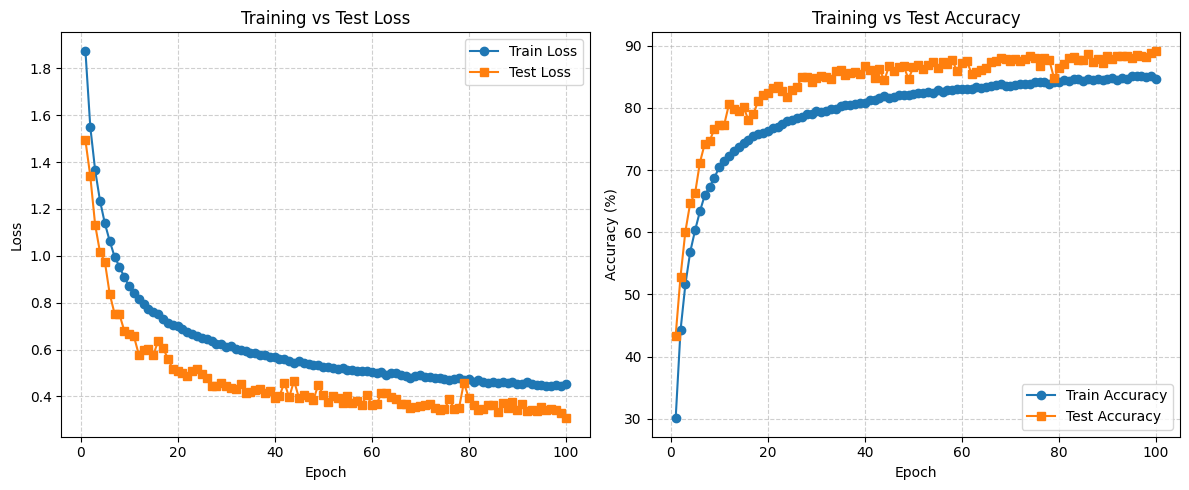

In [7]:
helper.plot_metrics(fp32_metrics)

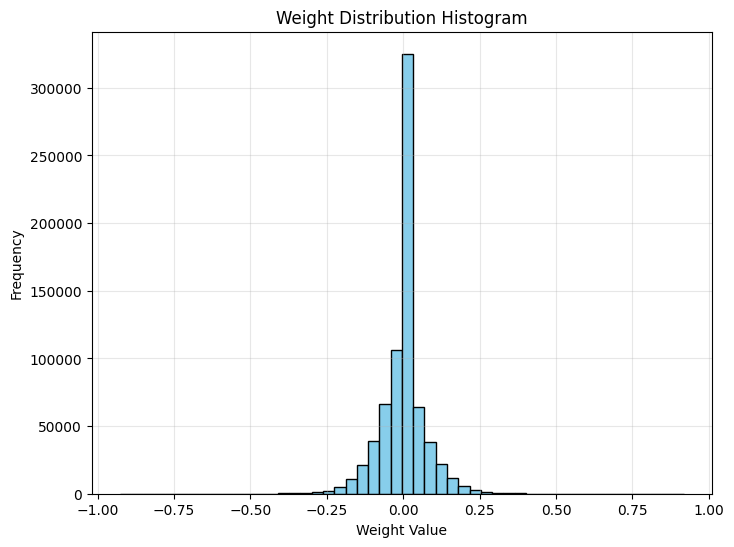

In [8]:
helper.plot_weight_histogram(model_fp32)

## Pruning

In [9]:
model = get_model()
model.load_model(f"{mname}_fp32.pth", device=device)
model.train()

Model loaded from squeezenet_fp32.pth


SqueezeNetCIFAR10(
  (conv1): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fire2): Fire(
    (conv1): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
  )
  (fire3): Fire(
    (conv1): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, af

In [ ]:
import copy
import torch.nn.utils.prune as prune

prune_levels = [(0.1,'10'), (0.3,'30'), (0.5,'50'), (0.7,'70')]
results = []

best = 0.0
best_name = ""

for p, pname in prune_levels:
    m = copy.deepcopy(model)

    parameters_to_prune = []
    for module in m.modules():
        if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
            parameters_to_prune.append((module, "weight"))

    prune.global_unstructured(
        parameters_to_prune,
        pruning_method=prune.L1Unstructured,
        amount=p
    )

    # fine-tune
    metrics = helper.train_model(model=m,train_loader=train_loader,test_loader=test_loader,device=device)

    # remove pruning masks
    for module in m.modules():
        if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
            prune.remove(module, "weight")

    percent = p * 100
    fname = f"{mname}_{pname}.pth"
    # m.save_model(fname)
    torch.save(m.state_dict(), fname)
    
    acc = helper.evaluate(m,test_loader,device)
    if acc > best:
        best = acc
        best_name = fname

    results.append((p, metrics))

Epoch [1/10] 

Train Loss: 0.4460, Train Acc: 84.97% 

Test/Val Loss: 0.3323, Test/Val Acc: 88.33%
Epoch [2/10] 

Train Loss: 0.4440, Train Acc: 85.16% 

Test/Val Loss: 0.3448, Test/Val Acc: 88.08%
Epoch [3/10] 

Train Loss: 0.4348, Train Acc: 85.43% 

Test/Val Loss: 0.3368, Test/Val Acc: 88.70%
Epoch [4/10] 

Train Loss: 0.4417, Train Acc: 85.18% 

Test/Val Loss: 0.3394, Test/Val Acc: 88.21%
Epoch [5/10] 

Train Loss: 0.4397, Train Acc: 85.21% 

Test/Val Loss: 0.3131, Test/Val Acc: 89.54%
Epoch [6/10] 

Train Loss: 0.4431, Train Acc: 85.11% 

Test/Val Loss: 0.3365, Test/Val Acc: 88.51%
Epoch [7/10] 

Train Loss: 0.4333, Train Acc: 85.59% 

Test/Val Loss: 0.3306, Test/Val Acc: 88.53%
Epoch [8/10] 

Train Loss: 0.4400, Train Acc: 85.29% 

Test/Val Loss: 0.3652, Test/Val Acc: 87.41%
Epoch [9/10] 

Train Loss: 0.4340, Train Acc: 85.45% 

Test/Val Loss: 0.3718, Test/Val Acc: 87.77%
Epoch [10/10] 

Train Loss: 0.4297, Train Acc: 85.44% 

Test/Val Loss: 0.3468, Test/Val Acc: 88.18%


Epoch [1/10] 

Train Loss: 0.4449, Train Acc: 85.15% 

Test/Val Loss: 0.3404, Test/Val Acc: 88.36%
Epoch [2/10] 

Train Loss: 0.4421, Train Acc: 85.16% 

Test/Val Loss: 0.3529, Test/Val Acc: 87.77%
Epoch [3/10] 

Train Loss: 0.4424, Train Acc: 85.24% 

Test/Val Loss: 0.3597, Test/Val Acc: 87.63%
Epoch [4/10] 

Train Loss: 0.4404, Train Acc: 85.29% 

Test/Val Loss: 0.3807, Test/Val Acc: 87.04%
Epoch [5/10] 

Train Loss: 0.4395, Train Acc: 85.26% 

Test/Val Loss: 0.3506, Test/Val Acc: 87.96%
Epoch [6/10] 

Train Loss: 0.4357, Train Acc: 85.60% 

Test/Val Loss: 0.3676, Test/Val Acc: 86.96%
Epoch [7/10] 

Train Loss: 0.4333, Train Acc: 85.33% 

Test/Val Loss: 0.3429, Test/Val Acc: 88.01%
Epoch [8/10] 

Train Loss: 0.4366, Train Acc: 85.35% 

Test/Val Loss: 0.3402, Test/Val Acc: 88.11%
Epoch [9/10] 

Train Loss: 0.4388, Train Acc: 85.33% 

Test/Val Loss: 0.3372, Test/Val Acc: 88.42%
Epoch [10/10] 

Train Loss: 0.4374, Train Acc: 85.27% 

Test/Val Loss: 0.3249, Test/Val Acc: 88.97%


Epoch [1/10] 

Train Loss: 0.4342, Train Acc: 85.31% 

Test/Val Loss: 0.3069, Test/Val Acc: 89.40%
Epoch [2/10] 

Train Loss: 0.4221, Train Acc: 85.91% 

Test/Val Loss: 0.3191, Test/Val Acc: 88.81%
Epoch [3/10] 

Train Loss: 0.4228, Train Acc: 85.83% 

Test/Val Loss: 0.3385, Test/Val Acc: 88.36%
Epoch [4/10] 

Train Loss: 0.4196, Train Acc: 85.78% 

Test/Val Loss: 0.3187, Test/Val Acc: 88.91%
Epoch [5/10] 

Train Loss: 0.4220, Train Acc: 85.90% 

Test/Val Loss: 0.3389, Test/Val Acc: 88.39%
Epoch [6/10] 

Train Loss: 0.4224, Train Acc: 85.86% 

Test/Val Loss: 0.3113, Test/Val Acc: 88.97%
Epoch [7/10] 

Train Loss: 0.4172, Train Acc: 86.09% 

Test/Val Loss: 0.3299, Test/Val Acc: 88.59%
Epoch [8/10] 

Train Loss: 0.4129, Train Acc: 86.12% 

Test/Val Loss: 0.3318, Test/Val Acc: 88.68%
Epoch [9/10] 

Train Loss: 0.4146, Train Acc: 86.09% 

Test/Val Loss: 0.3205, Test/Val Acc: 89.34%
Epoch [10/10] 

Train Loss: 0.4085, Train Acc: 86.26% 

Test/Val Loss: 0.3151, Test/Val Acc: 89.20%


Epoch [1/10] 

Train Loss: 0.4249, Train Acc: 85.61% 

Test/Val Loss: 0.2988, Test/Val Acc: 89.70%
Epoch [2/10] 

Train Loss: 0.4132, Train Acc: 86.05% 

Test/Val Loss: 0.3035, Test/Val Acc: 89.49%
Epoch [3/10] 

Train Loss: 0.4075, Train Acc: 86.37% 

Test/Val Loss: 0.3014, Test/Val Acc: 89.63%
Epoch [4/10] 

Train Loss: 0.3997, Train Acc: 86.44% 

Test/Val Loss: 0.3360, Test/Val Acc: 88.44%
Epoch [5/10] 

Train Loss: 0.3969, Train Acc: 86.63% 

Test/Val Loss: 0.3147, Test/Val Acc: 89.29%
Epoch [6/10] 

Train Loss: 0.3904, Train Acc: 86.86% 

Test/Val Loss: 0.3049, Test/Val Acc: 89.45%
Epoch [7/10] 

Train Loss: 0.4019, Train Acc: 86.57% 

Test/Val Loss: 0.3147, Test/Val Acc: 89.05%
Epoch [8/10] 

Train Loss: 0.3971, Train Acc: 86.60% 

Test/Val Loss: 0.3239, Test/Val Acc: 88.96%
Epoch [9/10] 

Train Loss: 0.3949, Train Acc: 86.76% 

Test/Val Loss: 0.3056, Test/Val Acc: 89.61%
Epoch [10/10] 

Train Loss: 0.3971, Train Acc: 86.70% 

Test/Val Loss: 0.3006, Test/Val Acc: 89.66%


Metrics for pruning with p=0.1


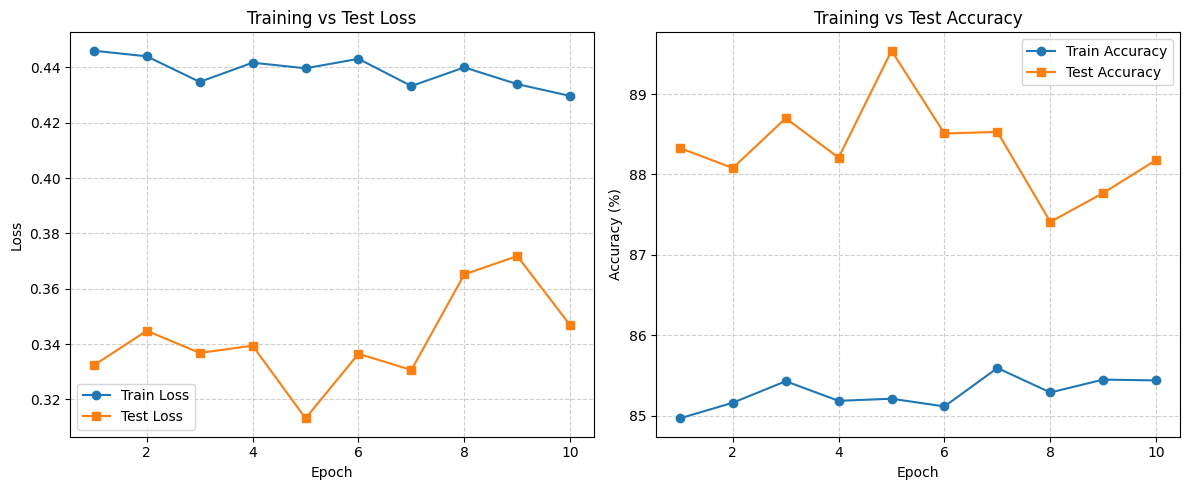

Metrics for pruning with p=0.3


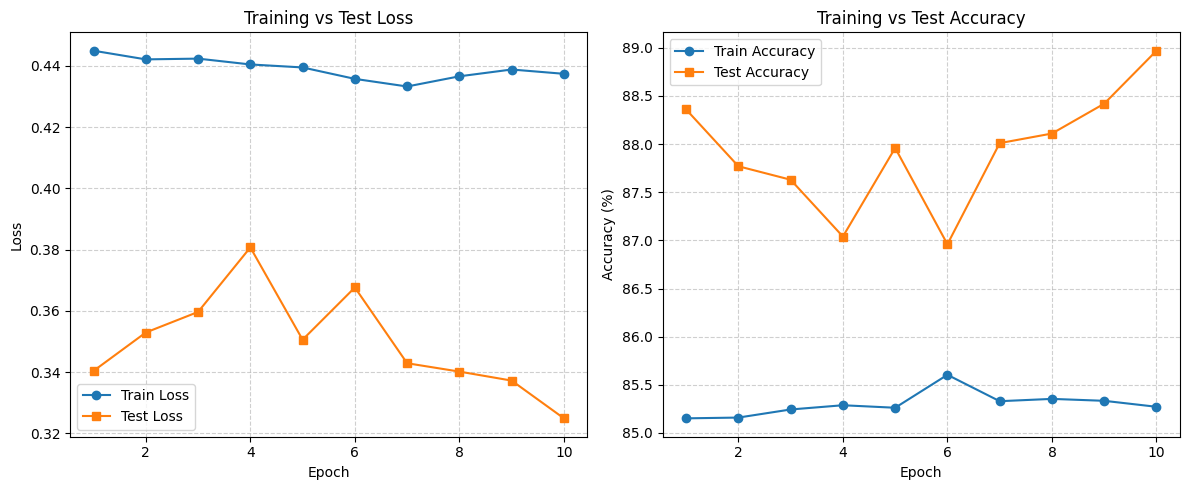

Metrics for pruning with p=0.5


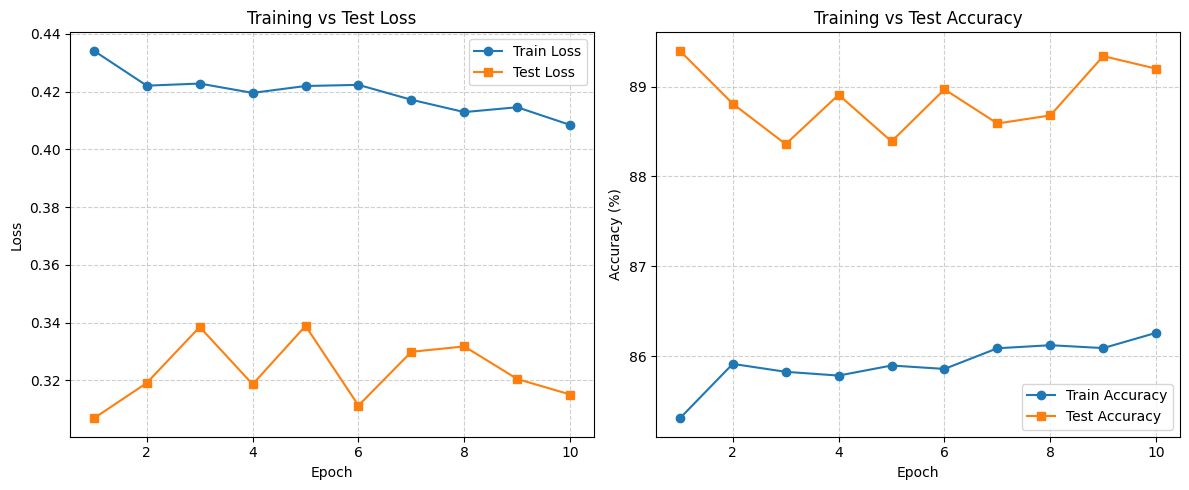

Metrics for pruning with p=0.7


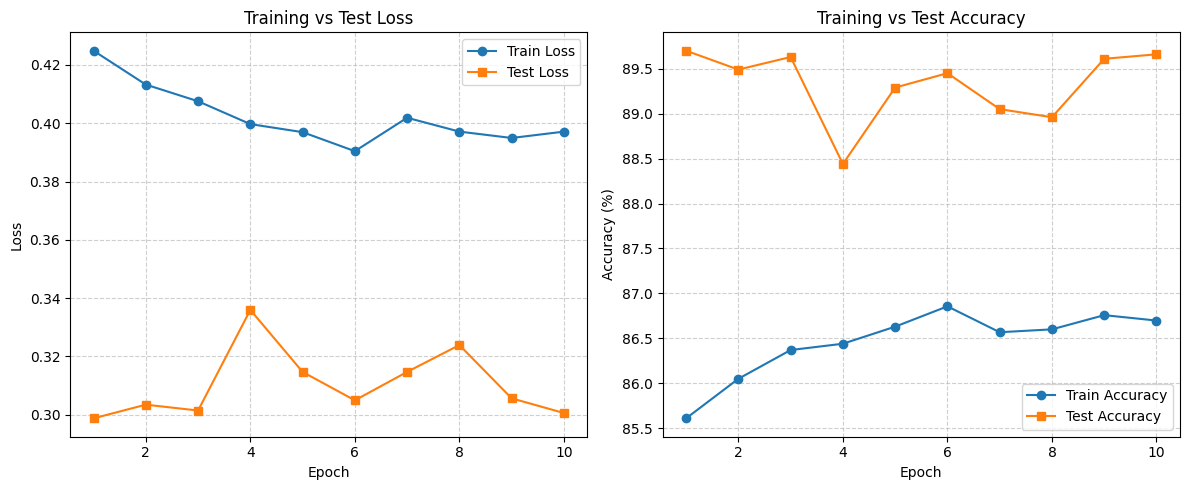

In [ ]:
for p, metrics in results:
    print(f"Metrics for pruning with p={p}")
    helper.plot_metrics(metrics)

## Quantization Aware Training

In [12]:
import torch
from torch.ao.quantization import get_default_qat_qconfig
from torch.ao.quantization.quantize_fx import prepare_qat_fx, convert_fx

model_qat = get_model_qat()
# model_qat.load_model(best_name, device='cpu')
state_dict = torch.load(best_name)
model_fp32.load_state_dict(state_dict)
model_qat.eval()

# example input for FX tracing
example_inputs = (torch.randn(1, 3, 32, 32, device='cpu'),)

# QAT config dictionary, default 8-bit symmetric QAT
qconfig_dict = {"": get_default_qat_qconfig('fbgemm')}

# prepare the model for QAT
model_qat_prepared = prepare_qat_fx(model_qat, qconfig_dict, example_inputs=example_inputs)

model_qat_prepared.to(device)
model_qat_prepared.train()

/tmp/SLURM_5266909/ipykernel_3151892/2910714172.py:18: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  model_qat_prepared = prepare_qat_fx(model_qat, qconfig_dict, example_inputs=example_inputs)
/home1/kodachi/.conda/envs/ee599/lib/python3.12/site-packages/torch/ao/quantization/quantize_fx.py:146: FutureWarning: Passing a QConfig dictionary to prepare is deprecated and wil

GraphModule(
  (activation_post_process_0): FusedMovingAvgObsFakeQuantize(
    fake_quant_enabled=tensor([1], device='cuda:0'), observer_enabled=tensor([1], device='cuda:0'), scale=tensor([1.], device='cuda:0'), zero_point=tensor([0], device='cuda:0', dtype=torch.int32), dtype=torch.quint8, quant_min=0, quant_max=127, qscheme=torch.per_tensor_affine, reduce_range=True
    (activation_post_process): MovingAverageMinMaxObserver(min_val=inf, max_val=-inf)
  )
  (conv1): ConvBnReLU2d(
    3, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)
    (bn): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (weight_fake_quant): FusedMovingAvgObsFakeQuantize(
      fake_quant_enabled=tensor([1], device='cuda:0'), observer_enabled=tensor([1], device='cuda:0'), scale=tensor([1.], device='cuda:0'), zero_point=tensor([0], device='cuda:0', dtype=torch.int32), dtype=torch.qint8, quant_min=-128, quant_max=127, qscheme=torch.per_channel_symmetric, reduce_range=False
  

In [ ]:
qat_metrics = helper.train_model(model=model_qat_prepared,train_loader=train_loader,test_loader=test_loader,device=device,epochs=20)

Epoch [1/20] 

Train Loss: 0.4553, Train Acc: 84.66% 

Test/Val Loss: 0.3590, Test/Val Acc: 87.61%
Epoch [2/20] 

Train Loss: 0.4547, Train Acc: 84.73% 

Test/Val Loss: 0.3459, Test/Val Acc: 88.25%
Epoch [3/20] 

Train Loss: 0.4505, Train Acc: 84.76% 

Test/Val Loss: 0.3364, Test/Val Acc: 88.48%
Epoch [4/20] 

Train Loss: 0.4549, Train Acc: 84.67% 

Test/Val Loss: 0.3465, Test/Val Acc: 88.25%
Epoch [5/20] 

Train Loss: 0.4561, Train Acc: 84.46% 

Test/Val Loss: 0.3380, Test/Val Acc: 88.41%
Epoch [6/20] 

Train Loss: 0.4577, Train Acc: 84.66% 

Test/Val Loss: 0.3392, Test/Val Acc: 88.29%
Epoch [7/20] 

Train Loss: 0.4504, Train Acc: 84.81% 

Test/Val Loss: 0.3306, Test/Val Acc: 88.58%
Epoch [8/20] 

Train Loss: 0.4473, Train Acc: 84.87% 

Test/Val Loss: 0.3282, Test/Val Acc: 88.79%
Epoch [9/20] 

Train Loss: 0.4488, Train Acc: 84.92% 

Test/Val Loss: 0.3619, Test/Val Acc: 87.35%
Epoch [10/20] 

Train Loss: 0.4495, Train Acc: 84.79% 

Test/Val Loss: 0.3446, Test/Val Acc: 89.03%
Epoch [11/20] 

Train Loss: 0.4492, Train Acc: 84.79% 

Test/Val Loss: 0.3263, Test/Val Acc: 88.73%
Epoch [12/20] 

Train Loss: 0.4383, Train Acc: 85.20% 

Test/Val Loss: 0.3388, Test/Val Acc: 88.45%
Epoch [13/20] 

Train Loss: 0.4410, Train Acc: 85.17% 

Test/Val Loss: 0.3310, Test/Val Acc: 88.69%
Epoch [14/20] 

Train Loss: 0.4367, Train Acc: 85.25% 

Test/Val Loss: 0.3252, Test/Val Acc: 88.71%
Epoch [15/20] 

Train Loss: 0.4431, Train Acc: 84.99% 

Test/Val Loss: 0.3358, Test/Val Acc: 88.55%
Epoch [16/20] 

Train Loss: 0.4358, Train Acc: 85.33% 

Test/Val Loss: 0.3510, Test/Val Acc: 88.18%
Epoch [17/20] 

Train Loss: 0.4443, Train Acc: 85.15% 

Test/Val Loss: 0.3418, Test/Val Acc: 88.06%
Epoch [18/20] 

Train Loss: 0.4415, Train Acc: 85.07% 

Test/Val Loss: 0.3315, Test/Val Acc: 88.34%
Epoch [19/20] 

Train Loss: 0.4430, Train Acc: 85.13% 

Test/Val Loss: 0.3394, Test/Val Acc: 88.46%
Epoch [20/20] 

Train Loss: 0.4380, Train Acc: 85.33% 

Test/Val Loss: 0.3301, Test/Val Acc: 88.71%


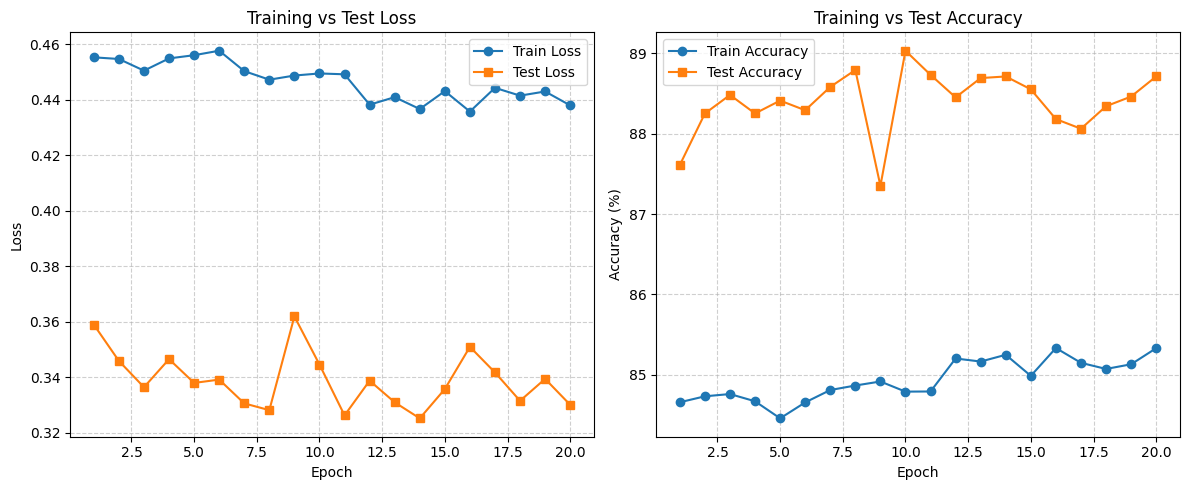

In [ ]:
helper.plot_metrics(qat_metrics)

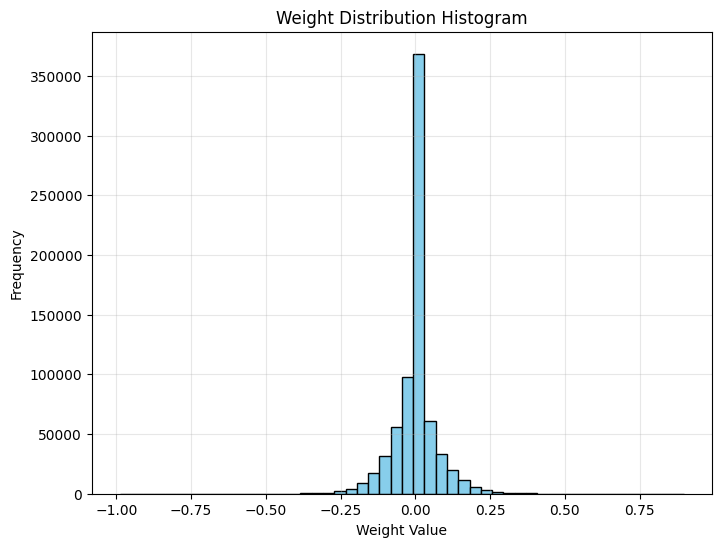

In [ ]:
helper.plot_weight_histogram(model_qat_prepared)

In [16]:
model_qat_prepared.eval()
torch.save(model_qat_prepared.state_dict(), f"{mname}_qat_preconvert.pth")
# model_int8 = convert_fx(model_qat_prepared.cpu())
# torch.save(model_int8.state_dict(), "squeezenet_int8_qat.pth")